### Importing the necessary packages ###

In [1]:
# Libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing our dataset ###

In [2]:
data= pd.read_csv('air_quality_dataset.csv')
data.head(3)

,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction,Location_Type,Source_Label
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276,Urban,Vehicular
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134,Industrial,Industrial
2,70.996192,138.948796,158.731020,60.466604,14.892239,145.147338,2.626446,499.889443,2.431165,33.778698,54.875669,1,Industrial,Industrial


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum().sum()

0

*Our data is free from duplicates and Nan values*

### Data Visualization ###

**Univariate Analysis of Numerical Columns** 

In [6]:
data.columns

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'VOCs', 'CO', 'CO2', 'CH4',
       'Temperature', 'Humidity', 'Wind_Direction', 'Location_Type',
       'Source_Label'],
      dtype='object')

In [7]:
num_cols=data.select_dtypes(include='number')

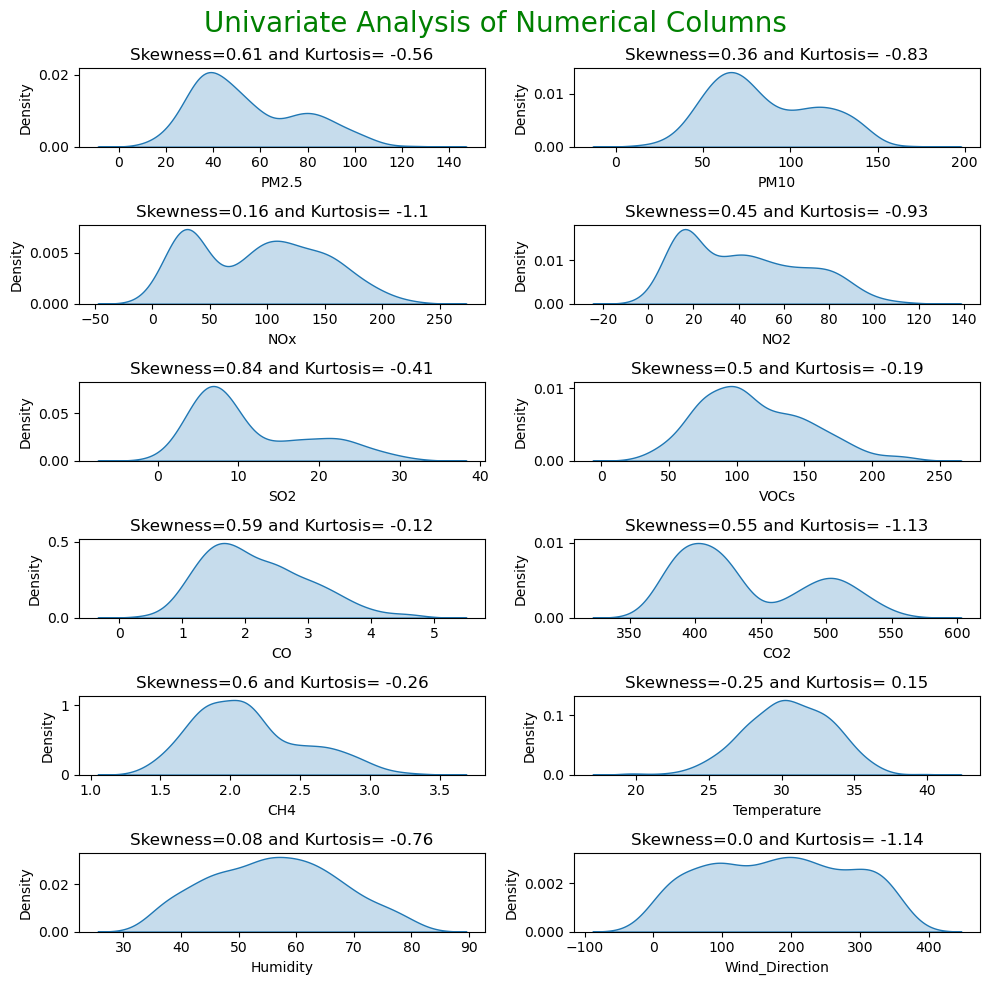

In [8]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Columns',color='green', size=20)
for i in num_cols:
    s,k=data[i].skew(), data[i].kurt()
    plt.subplot(6,2,t)
    sns.kdeplot(data[i], fill=True)
    plt.title(f'Skewness={round(s,2)} and Kurtosis= {round(k,2)}')
    t+=1
plt.tight_layout()    
plt.show()

**what inferences can we draw from the above graphs?**
- the data is slightly right-skewed in most of our variables
- there might be outliers present in our numerical columns
- we will check for the outliers in the coming steps
- overall, the data looks mostly normal

## Univariate Analysis of categorical columns ##

In [3]:
cat_cols=['Location_Type','Source_Label']

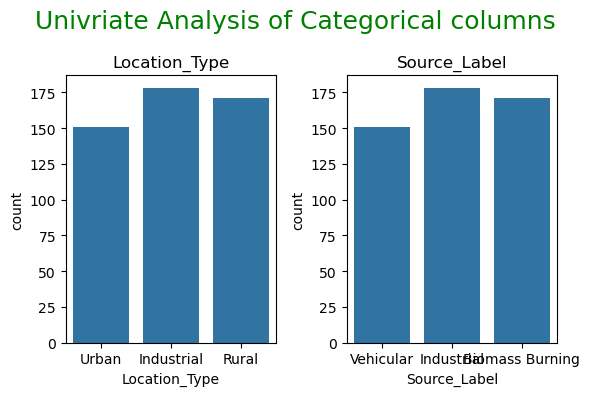

In [10]:
t=1
plt.figure(figsize=(6,4))
plt.suptitle('Univriate Analysis of Categorical columns', color='green', size=18)
for i in cat_cols:
    plt.subplot(1,2,t)
    sns.countplot(data=data, x=i)
    t+=1
    plt.title(f'{i}') 
plt.tight_layout()
plt.show()

**we can see the distribution of data in our various categories**

## Outlier detection ##

In [11]:
num_cols.head(2)

,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134


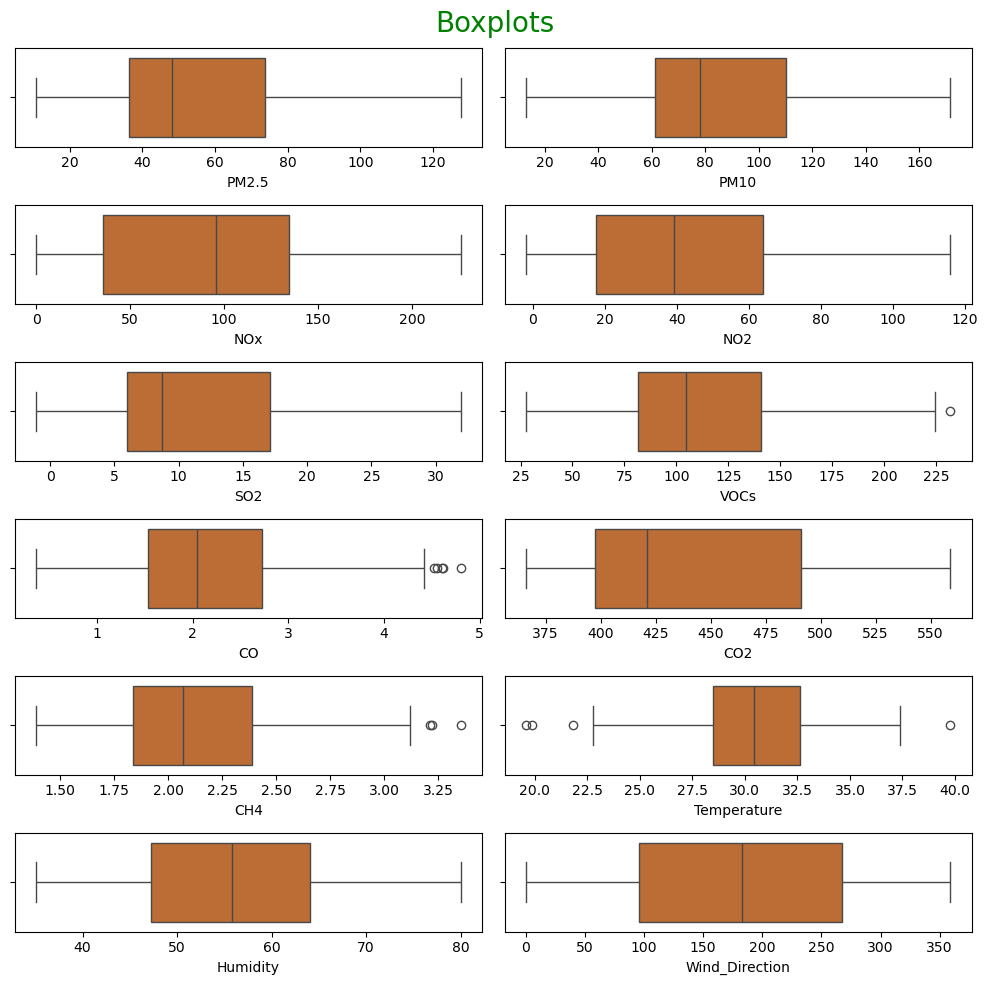

In [12]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('Boxplots',color='green', size=20)
for i in num_cols:
    plt.subplot(6,2,t)
    sns.boxplot(data, x=i, color='chocolate')
    t+=1
plt.tight_layout()    
plt.show()


In [13]:
#there are only a few outliers present in some columns:
out=['CH4','Temperature','CO','VOCs']

**Outlier treatment**

In [14]:
for i in out:
    q1,q3=data[i].quantile(0.25), data[i].quantile(0.75)
    iqr=q3-q1
    ll,ul=q1-1.5*iqr, q3+1.5*iqr
    data[i]=data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

In [15]:
data[out].shape

(500, 4)

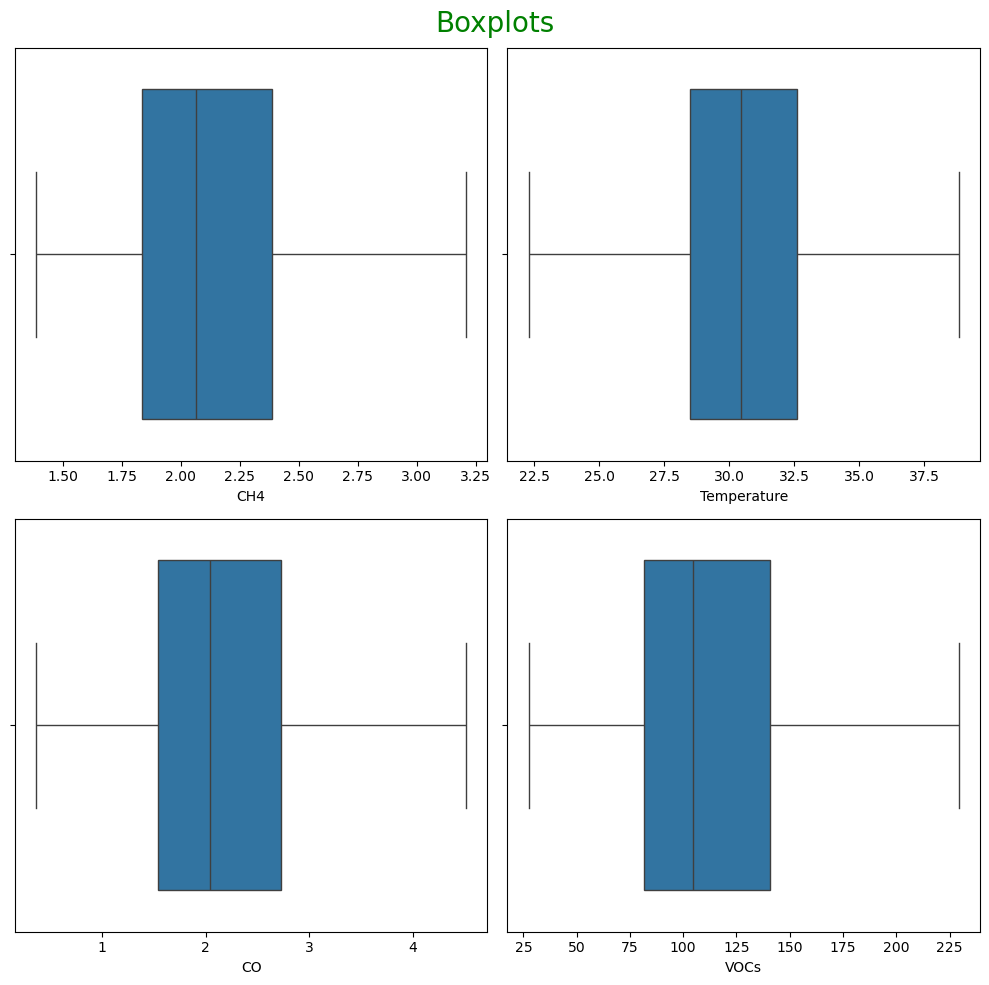

In [16]:
t=1
plt.figure(figsize=(10,10))
plt.suptitle('Boxplots',color='green', size=20)
for i in out:
    plt.subplot(2,2,t)
    sns.boxplot(data, x=i)
    t+=1
plt.tight_layout()    
plt.show()

**Hence, the outliers are treated by capping them using IQR method (Inter-Quartile Range)**

## Bivariate Analysis ##

In [17]:
data.columns

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'VOCs', 'CO', 'CO2', 'CH4',
       'Temperature', 'Humidity', 'Wind_Direction', 'Location_Type',
       'Source_Label'],
      dtype='object')

In [18]:
num1=['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'VOCs']

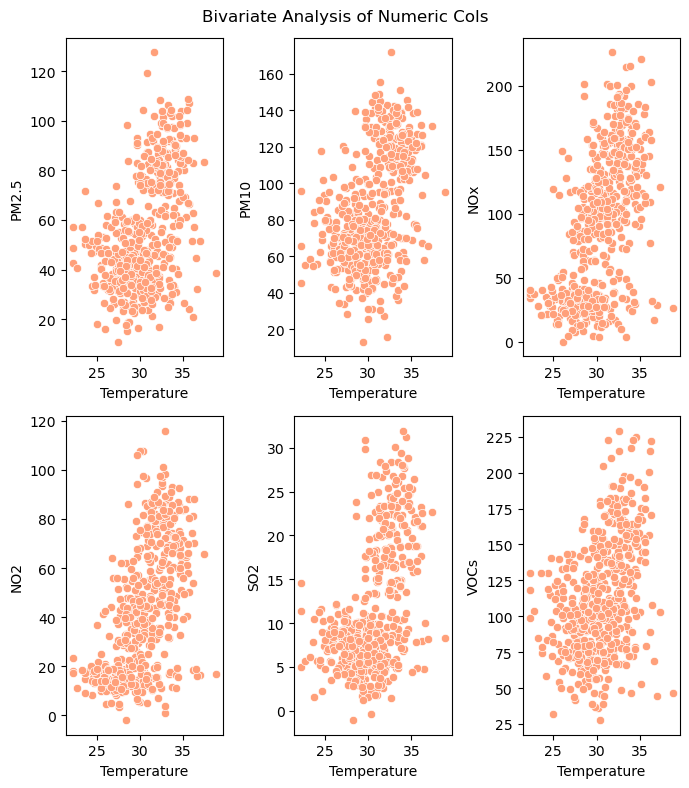

In [19]:
t=1
plt.figure(figsize=(7,8))
plt.suptitle('Bivariate Analysis of Numeric Cols')
for i in num1:
    if i !='Temperature':
        plt.subplot(2,3,t)
        sns.scatterplot(data, x='Temperature', y=i, color='lightsalmon')
        t+=1
        
plt.tight_layout()
plt.show()

In [20]:
num=['CO', 'CO2', 'CH4',
       'Temperature', 'Humidity', 'Wind_Direction']

* Analysis of numerical columns with **Temperature**

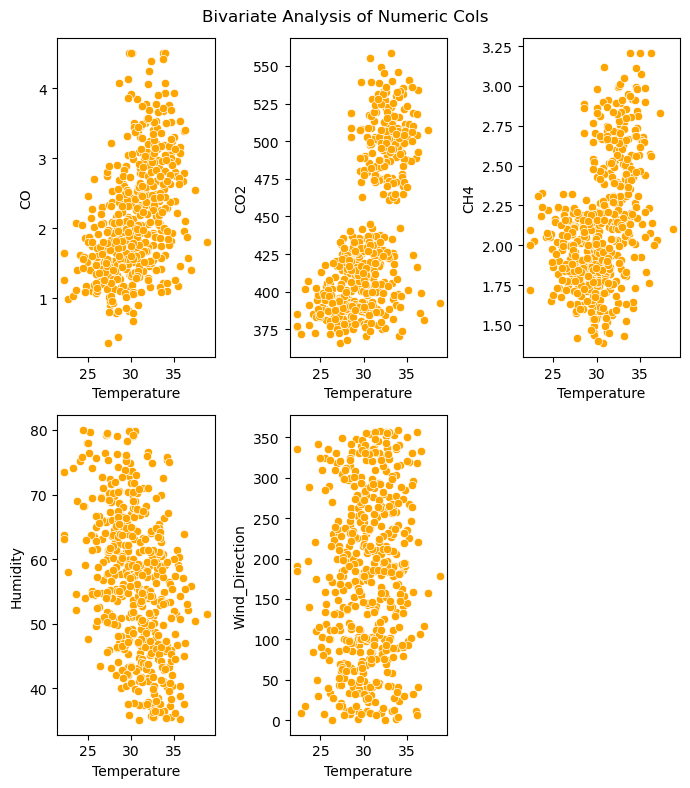

In [21]:
t=1
plt.figure(figsize=(7,8))
plt.suptitle('Bivariate Analysis of Numeric Cols')
for i in num:
    if i !='Temperature':
        plt.subplot(2,3,t)
        sns.scatterplot(data, x='Temperature', y=i, color='orange')
        t+=1
plt.tight_layout()
plt.show()

* categorical vs numerical column *

In [22]:
cat_cols

['Location_Type', 'Source_Label']

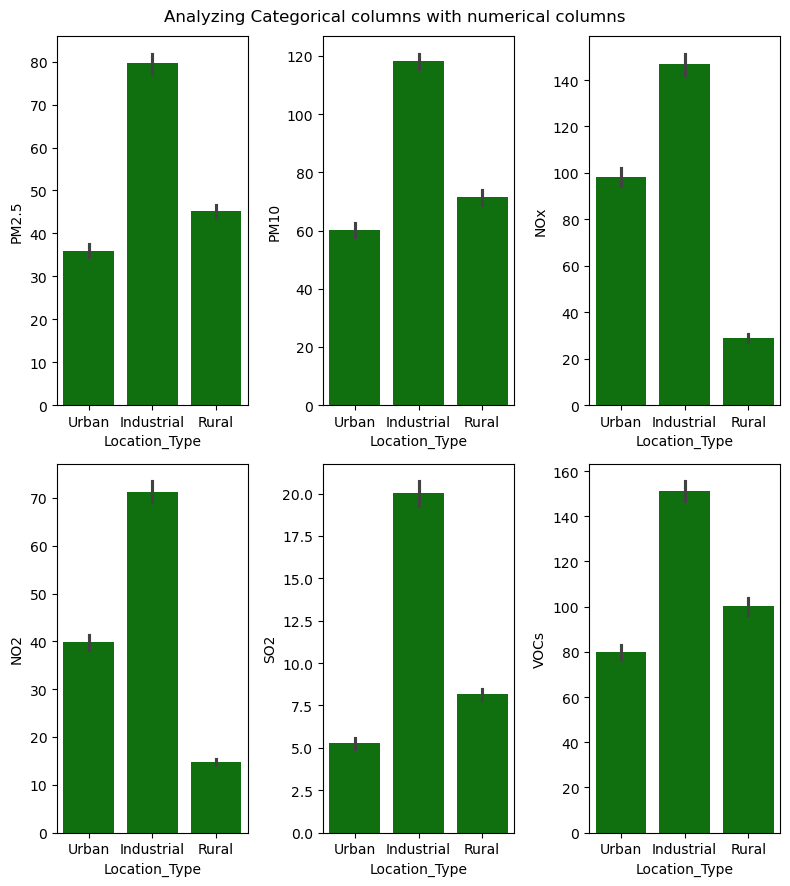

In [23]:
t=1
plt.figure(figsize=(8,9))
plt.suptitle('Analyzing Categorical columns with numerical columns')
for i in num1:
    plt.subplot(2,3,t)
    sns.barplot(x='Location_Type', y=i, data=data, color='green')
    t+=1

plt.tight_layout()
plt.show()
    

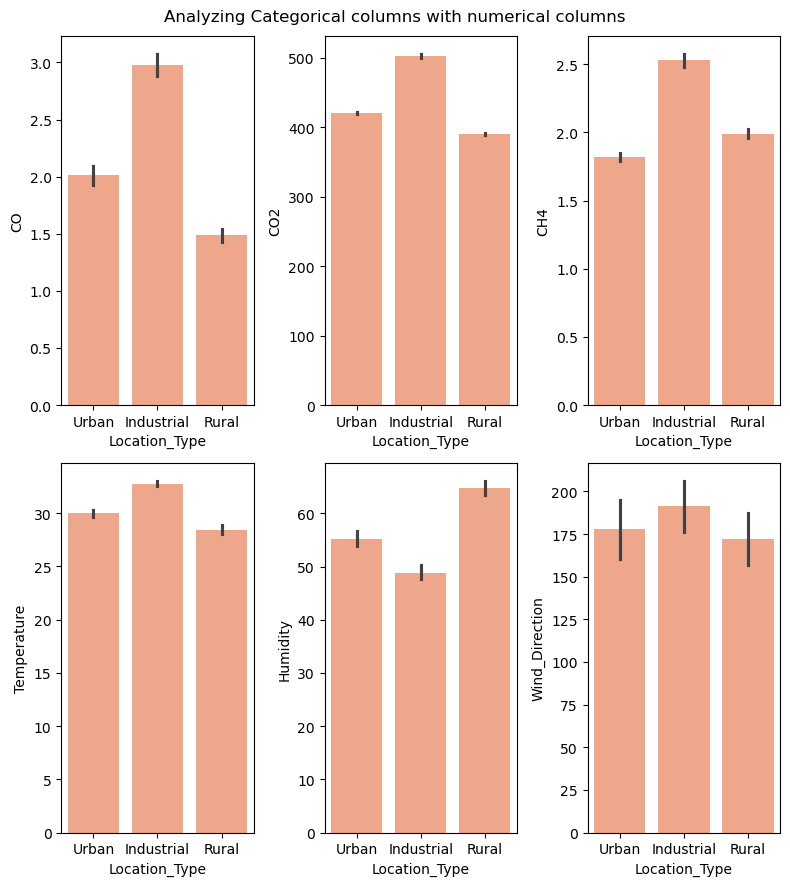

In [24]:
t=1
plt.figure(figsize=(8,9))
plt.suptitle('Analyzing Categorical columns with numerical columns')
for i in num:
    plt.subplot(2,3,t)
    sns.barplot(x='Location_Type', y=i, data=data, color='lightsalmon')
    t+=1

plt.tight_layout()
plt.show()

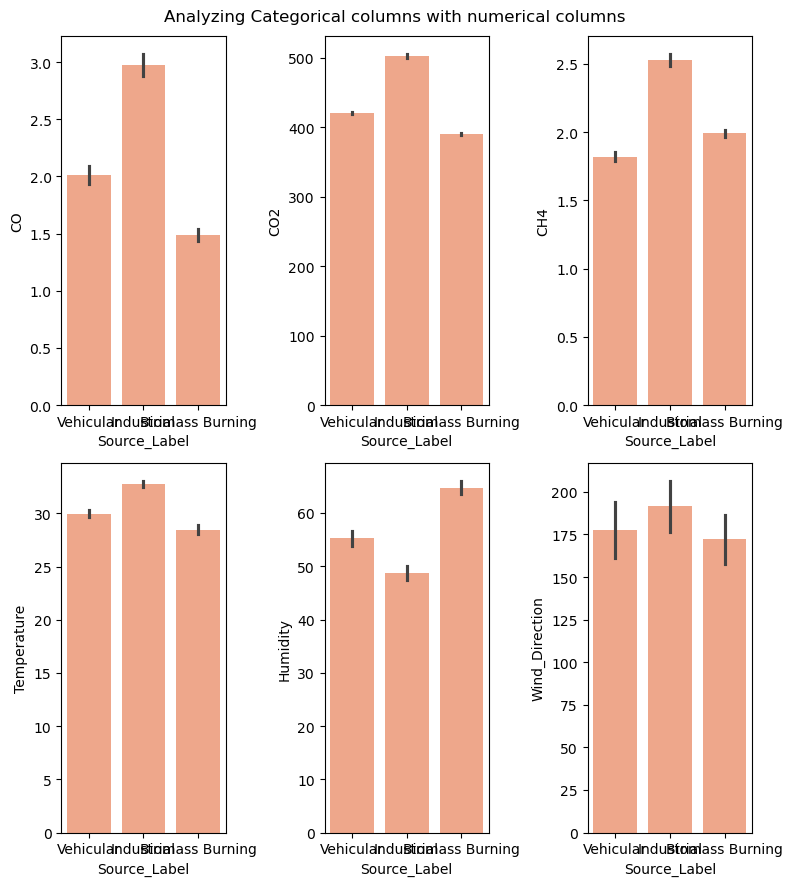

In [25]:
t=1
plt.figure(figsize=(8,9))
plt.suptitle('Analyzing Categorical columns with numerical columns')
for i in num:
    plt.subplot(2,3,t)
    sns.barplot(x='Source_Label', y=i, data=data, color='lightsalmon')
    t+=1

plt.tight_layout()
plt.show()

## Multivariate Analysis ##

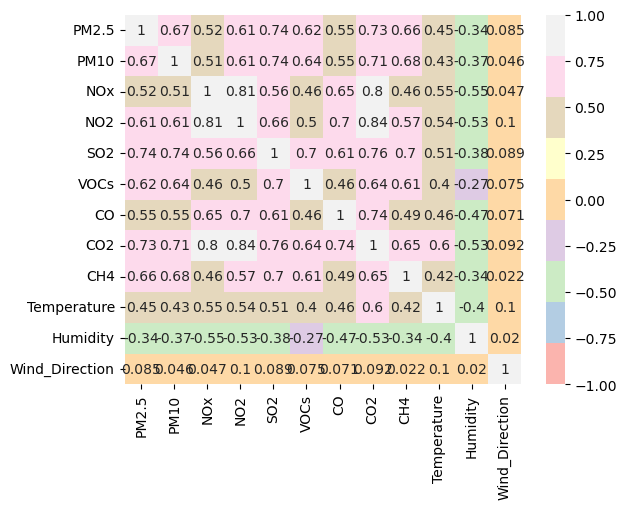

In [26]:
sns.heatmap(data.select_dtypes(np.number).corr(),vmax=1,vmin=-1,annot=True,cmap='Pastel1')
plt.show()

In [27]:
data.columns

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'VOCs', 'CO', 'CO2', 'CH4',
       'Temperature', 'Humidity', 'Wind_Direction', 'Location_Type',
       'Source_Label'],
      dtype='object')

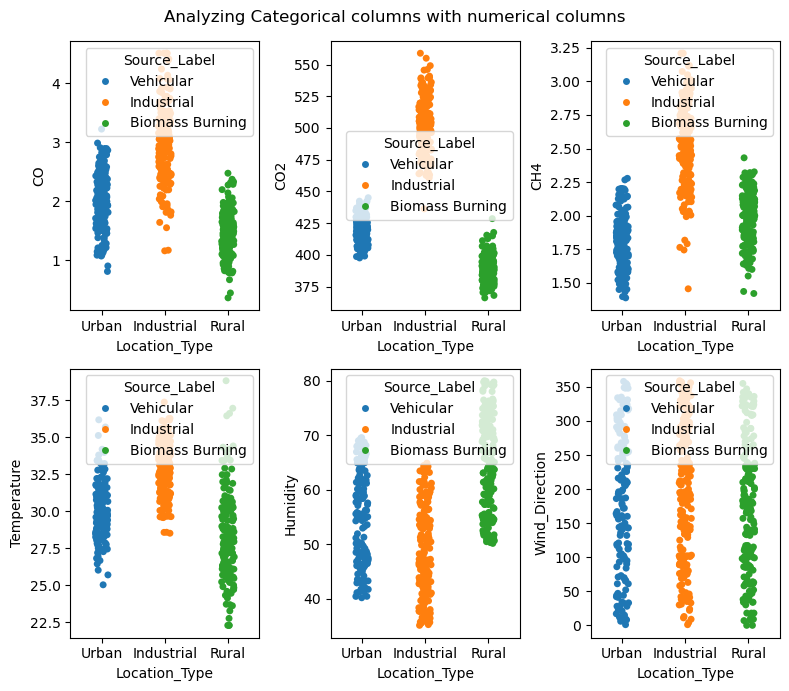

In [36]:
t=1
plt.figure(figsize=[8,7])
plt.suptitle('Analyzing Categorical columns with numerical columns')
for i in num:
    plt.subplot(2,3,t)
    sns.stripplot(data, x='Location_Type', y=i, hue='Source_Label')
    t+=1

plt.tight_layout()
plt.show()

*we have visualized the data using various graphs*

**We do not have to do any missing value treatment, since there are no missing values.**

**Also, the data looks almost normal so there is no such need for normalizing/scaling it.**

In [5]:
data.columns

Index(['PM2.5', 'PM10', 'NOx', 'NO2', 'SO2', 'VOCs', 'CO', 'CO2', 'CH4',
       'Temperature', 'Humidity', 'Wind_Direction', 'Location_Type',
       'Source_Label'],
      dtype='object')

In [6]:
data['Source_Label'].unique()

array(['Vehicular', 'Industrial', 'Biomass Burning'], dtype=object)

In [7]:
data['Location_Type'].unique()

array(['Urban', 'Industrial', 'Rural'], dtype=object)

## Encoding ##

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le= LabelEncoder()

In [18]:
data['Source_Label']=le.fit_transform(data['Source_Label'])

In [21]:
data['Location_Type'].unique()

array(['Urban', 'Industrial', 'Rural'], dtype=object)

In [22]:
data['Location_Type']=le.fit_transform(data['Location_Type'])

In [23]:
data

,PM2.5,PM10,NOx,NO2,SO2,VOCs,CO,CO2,CH4,Temperature,Humidity,Wind_Direction,Location_Type,Source_Label
0,39.967142,57.926035,116.192213,55.230299,4.531693,75.317261,2.789606,427.674347,1.706105,31.085120,45.454749,276,2,2
1,101.935672,150.774299,76.826826,79.051618,18.744780,145.083987,1.966569,529.739619,2.492663,33.711103,60.798212,134,0,1
2,70.996192,138.948796,158.731020,60.466604,14.892239,145.147338,2.626446,499.889443,2.431165,33.778698,54.875669,1,0,1
3,28.464728,63.643900,25.385343,15.333286,7.647429,130.022319,1.779360,388.283712,1.818563,31.565877,67.113319,251,1,0
4,78.265276,113.977926,105.644340,59.202337,17.696806,181.713667,3.240533,464.739197,2.597225,32.229835,37.236519,326,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,51.380025,57.573550,31.124630,19.276010,11.167098,104.071502,1.844483,397.418878,1.923525,34.323410,67.148831,289,1,0
496,46.816837,75.372133,22.174014,18.535162,12.169426,74.802208,1.364096,392.316075,2.157281,26.321361,65.549718,270,1,0
497,33.909351,88.097250,27.630317,15.653370,7.997326,128.105470,2.319453,378.653347,1.809489,28.964494,72.687008,185,1,0
498,43.721651,40.847991,27.253977,19.365916,7.218154,106.053329,1.599748,389.878566,1.858964,29.976442,65.043244,272,1,0
